In [5]:
import pandas as pd
import numpy as np
df1=pd.read_csv("bioactivity_data_flavormolecules_actual_datapreprocessed_output22.csv")

### **Label compounds as Active, Inactive and Intermediate**
Labeling compounds as either being active, inactive or intermediate
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [6]:
bioactivity_threshold = []
for i in df1.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")

In [7]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df2 = pd.concat([df1, bioactivity_class], axis=1)
df2.rename(columns = {'molecule_chembl_id':'chembl_id'}, inplace = True) 
df2.head()

,chembl_id,molecule_pref_name,standard_value,target_chembl_id,target_pref_name,target_organism,class
0,CHEMBL165,RESVERATROL,0.0225,CHEMBL399,HeLa,Homo sapiens,active
1,CHEMBL19224,PAPAVERINE,0.0590,CHEMBL613633,Ileum,Rattus norvegicus,active
2,CHEMBL50,QUERCETIN,0.1100,CHEMBL2362975,No relevant target,NaN,active
3,CHEMBL107,COLCHICINE,0.3600,CHEMBL3879801,NON-PROTEIN TARGET,NaN,active
4,CHEMBL441687,GLYCYRRHIZIN,0.4000,CHEMBL3746,11-beta-hydroxysteroid dehydrogenase 2,Homo sapiens,active


In [8]:
#! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import matplotlib.pyplot as plt

In [5]:
df2.head()

,chembl_id,molecule_pref_name,standard_value,target_chembl_id,target_pref_name,target_organism,class
0,CHEMBL165,RESVERATROL,0.0225,CHEMBL399,HeLa,Homo sapiens,active
1,CHEMBL19224,PAPAVERINE,0.0590,CHEMBL613633,Ileum,Rattus norvegicus,active
2,CHEMBL50,QUERCETIN,0.1100,CHEMBL2362975,No relevant target,NaN,active
3,CHEMBL107,COLCHICINE,0.3600,CHEMBL3879801,NON-PROTEIN TARGET,NaN,active
4,CHEMBL441687,GLYCYRRHIZIN,0.4000,CHEMBL3746,11-beta-hydroxysteroid dehydrogenase 2,Homo sapiens,active


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [9]:
df2.standard_value.describe()

count    3.650000e+02
mean     5.559458e+06
std      5.365129e+07
min      2.250000e-02
25%      1.220000e+03
50%      1.700000e+04
75%      1.200000e+05
max      9.069430e+08
Name: standard_value, dtype: float64

In [10]:
#norm = []
df2['standard_value_norm']=df2['standard_value']
for i in range(len(df2['standard_value'])):
    k=df2['standard_value_norm'][i]
    if k > 100000000:
        #df['column name'] = df['column name'].replace(['old value'],'new value')
        df2["standard_value_norm"]=df2["standard_value_norm"].replace([k],100000000)

In [11]:
df2.standard_value_norm.describe()

count    3.650000e+02
mean     2.328929e+06
std      1.250262e+07
min      2.250000e-02
25%      1.220000e+03
50%      1.700000e+04
75%      1.200000e+05
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [12]:
pIC50 = []
for i in df2['standard_value_norm']:
    molar = i*(10**-9) # Converts nM to M
    pIC50.append(-np.log10(molar))

In [13]:
len(df2)

365

In [73]:
len(pIC50)

365

In [14]:
df2['pIC50']=pIC50
df2.head()

,chembl_id,molecule_pref_name,standard_value,target_chembl_id,target_pref_name,target_organism,class,standard_value_norm,pIC50
0,CHEMBL165,RESVERATROL,0.0225,CHEMBL399,HeLa,Homo sapiens,active,0.0225,10.647817
1,CHEMBL19224,PAPAVERINE,0.0590,CHEMBL613633,Ileum,Rattus norvegicus,active,0.0590,10.229148
2,CHEMBL50,QUERCETIN,0.1100,CHEMBL2362975,No relevant target,NaN,active,0.1100,9.958607
3,CHEMBL107,COLCHICINE,0.3600,CHEMBL3879801,NON-PROTEIN TARGET,NaN,active,0.3600,9.443697
4,CHEMBL441687,GLYCYRRHIZIN,0.4000,CHEMBL3746,11-beta-hydroxysteroid dehydrogenase 2,Homo sapiens,active,0.4000,9.397940


In [15]:
df2.head()
df_norm=df2.drop(columns=['standard_value','standard_value_norm'])
df_norm.head()

,chembl_id,molecule_pref_name,target_chembl_id,target_pref_name,target_organism,class,pIC50
0,CHEMBL165,RESVERATROL,CHEMBL399,HeLa,Homo sapiens,active,10.647817
1,CHEMBL19224,PAPAVERINE,CHEMBL613633,Ileum,Rattus norvegicus,active,10.229148
2,CHEMBL50,QUERCETIN,CHEMBL2362975,No relevant target,NaN,active,9.958607
3,CHEMBL107,COLCHICINE,CHEMBL3879801,NON-PROTEIN TARGET,NaN,active,9.443697
4,CHEMBL441687,GLYCYRRHIZIN,CHEMBL3746,11-beta-hydroxysteroid dehydrogenase 2,Homo sapiens,active,9.397940


In [16]:
df_nat=pd.read_csv('df2.csv')     #1145 ids chembl_pubchem_decriptors
df_nat.head()

,pubchem_id,molecular_weight,hbd_count,hba_count,xlogp,natural,chembl_id
0,4,75.111,2,2,-1.0,1,CHEMBL326602
1,49,116.116,1,3,0.7,1,CHEMBL146554
2,58,102.089,1,3,0.1,1,CHEMBL171246
3,70,130.143,1,3,0.9,1,CHEMBL445647
4,72,154.121,3,4,1.1,1,CHEMBL37537


In [17]:
df_nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pubchem_id        1145 non-null   int64  
 1   molecular_weight  1145 non-null   float64
 2   hbd_count         1145 non-null   int64  
 3   hba_count         1145 non-null   int64  
 4   xlogp             1126 non-null   float64
 5   natural           1145 non-null   int64  
 6   chembl_id         1145 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 62.7+ KB


In [18]:
fdb_bio=df_norm.merge(df_nat,on=['chembl_id'], how="inner")
fdb_bio.info()
fdb_bio.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chembl_id           365 non-null    object 
 1   molecule_pref_name  306 non-null    object 
 2   target_chembl_id    365 non-null    object 
 3   target_pref_name    365 non-null    object 
 4   target_organism     293 non-null    object 
 5   class               365 non-null    object 
 6   pIC50               365 non-null    float64
 7   pubchem_id          365 non-null    int64  
 8   molecular_weight    365 non-null    float64
 9   hbd_count           365 non-null    int64  
 10  hba_count           365 non-null    int64  
 11  xlogp               364 non-null    float64
 12  natural             365 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 39.9+ KB


,chembl_id,molecule_pref_name,target_chembl_id,target_pref_name,target_organism,class,pIC50,pubchem_id,molecular_weight,hbd_count,hba_count,xlogp,natural
0,CHEMBL165,RESVERATROL,CHEMBL399,HeLa,Homo sapiens,active,10.647817,445154,228.247,3,3,3.1,1
1,CHEMBL19224,PAPAVERINE,CHEMBL613633,Ileum,Rattus norvegicus,active,10.229148,4680,339.391,0,5,3.9,1
2,CHEMBL50,QUERCETIN,CHEMBL2362975,No relevant target,NaN,active,9.958607,5280343,302.238,5,7,1.5,1
3,CHEMBL107,COLCHICINE,CHEMBL3879801,NON-PROTEIN TARGET,NaN,active,9.443697,6167,399.443,1,6,1.0,1
4,CHEMBL441687,GLYCYRRHIZIN,CHEMBL3746,11-beta-hydroxysteroid dehydrogenase 2,Homo sapiens,active,9.397940,14982,822.942,8,16,3.7,1


In [19]:
df6=fdb_bio.drop(['target_organism'], axis=1)
df6.head()

,chembl_id,molecule_pref_name,target_chembl_id,target_pref_name,class,pIC50,pubchem_id,molecular_weight,hbd_count,hba_count,xlogp,natural
0,CHEMBL165,RESVERATROL,CHEMBL399,HeLa,active,10.647817,445154,228.247,3,3,3.1,1
1,CHEMBL19224,PAPAVERINE,CHEMBL613633,Ileum,active,10.229148,4680,339.391,0,5,3.9,1
2,CHEMBL50,QUERCETIN,CHEMBL2362975,No relevant target,active,9.958607,5280343,302.238,5,7,1.5,1
3,CHEMBL107,COLCHICINE,CHEMBL3879801,NON-PROTEIN TARGET,active,9.443697,6167,399.443,1,6,1.0,1
4,CHEMBL441687,GLYCYRRHIZIN,CHEMBL3746,11-beta-hydroxysteroid dehydrogenase 2,active,9.397940,14982,822.942,8,16,3.7,1


In [12]:
fdb_bio.to_csv('fdb_classification_bioactivity_pIC50.csv', index=False)

<font size=4> Intermediate Class was not considered for <b>Exploratory Data Analysis</b></font>

In [20]:
# removing the intermediate class
df_2class = fdb_bio[fdb_bio['class'] != 'intermediate']
df_2class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 364
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chembl_id           297 non-null    object 
 1   molecule_pref_name  244 non-null    object 
 2   target_chembl_id    297 non-null    object 
 3   target_pref_name    297 non-null    object 
 4   target_organism     243 non-null    object 
 5   class               297 non-null    object 
 6   pIC50               297 non-null    float64
 7   pubchem_id          297 non-null    int64  
 8   molecular_weight    297 non-null    float64
 9   hbd_count           297 non-null    int64  
 10  hba_count           297 non-null    int64  
 11  xlogp               296 non-null    float64
 12  natural             297 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 32.5+ KB


In [21]:
df_2class.to_csv('fdb_classification_bioactivity_pIC50_onlyactive_inactive.csv', index=False)

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**
## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

In [3]:
import pandas as pd
import seaborn as sns
#sns.set_theme(style="darkgrid")
sns.set(style='ticks')
import matplotlib.pyplot as plt
df_fla=pd.read_csv("fdb_molecules_22Nov.csv")

## **Frequency plot of the Synthetic and Natural Molecules in Flavor Db**

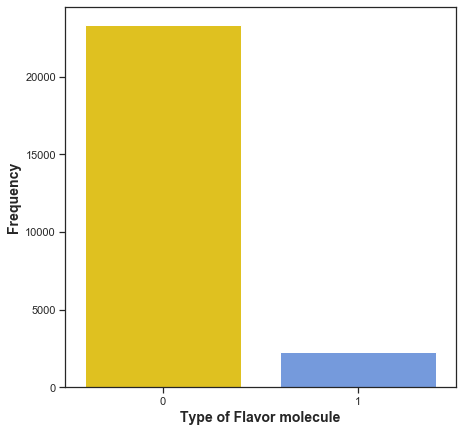

In [4]:
plt.figure(figsize=(7,7))

sns.countplot(x='natural', data=df_fla,palette=['gold','cornflowerblue'])

plt.xlabel('Type of Flavor molecule', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_synthtic_nativecount_class.png')

## **Frequency plot of the 2 bioactivity classes**

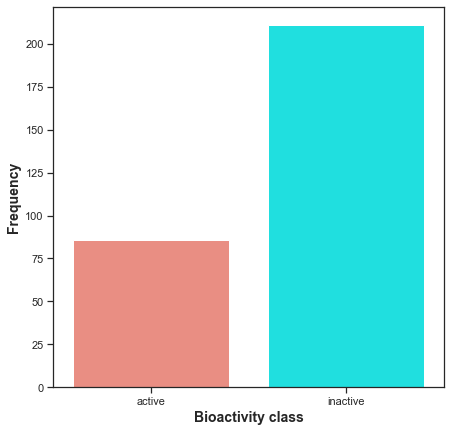

In [141]:
plt.figure(figsize=(7,7))

sns.countplot(x='class', data=df_2class,palette=['salmon','cyan'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.png')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

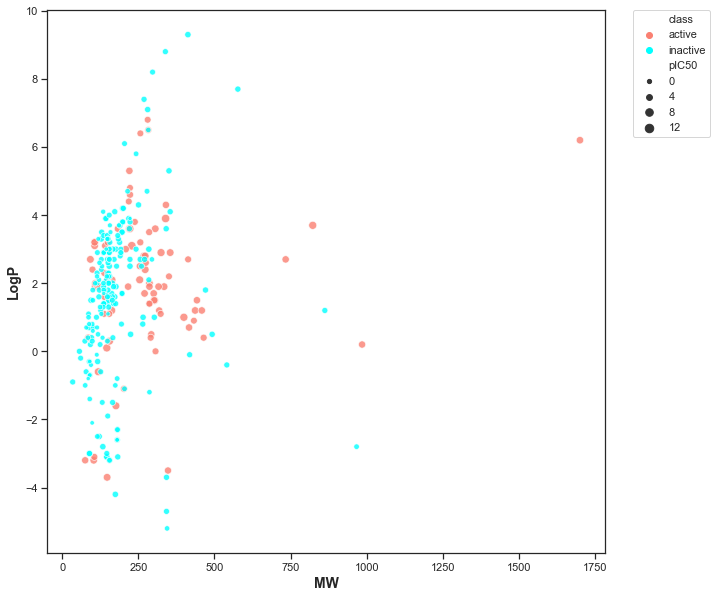

In [122]:
plt.figure(figsize=(10,10))

sns.scatterplot(x='molecular_weight', y='xlogp', data=df_2class, hue='class',palette=['salmon','cyan'], size='pIC50', alpha=0.8)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.png')

### **Box plots**

#### **pIC50 value**

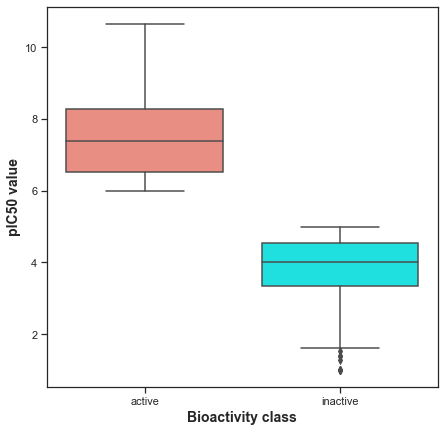

In [140]:
plt.figure(figsize=(7, 7))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class,palette=['salmon','cyan'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.png') #threshold >6 active, <6 inactive

In [124]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
# actives and inactives
    selection = [descriptor, 'class']
    df = df_2class[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df = df_2class[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]
   # compare samples
    stat, p = mannwhitneyu(active, inactive)
      #print('Statistics=%.3f, p=%.3f' % (stat, p))
      # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

In [125]:
mannwhitney('pIC50')
# compare active to inactive calss to see if there is any statistical difference between active or nactive class or not
# p value < 0.05 , rejecting null hypothesis and thus we can say that active and inactive classes have different distribution

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,6.087553e-42,0.05,Different distribution (reject H0)


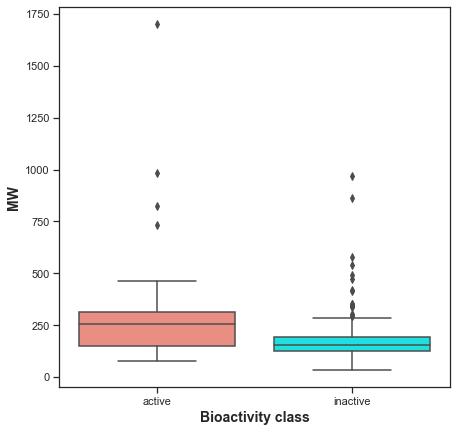

In [126]:
plt.figure(figsize=(7, 7))

sns.boxplot(x = 'class', y = 'molecular_weight', data = df_2class,palette=['salmon','cyan'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.png')

In [127]:
mannwhitney('molecular_weight')

,Descriptor,Statistics,p,alpha,Interpretation
0,molecular_weight,5254.5,6.436918e-09,0.05,Different distribution (reject H0)


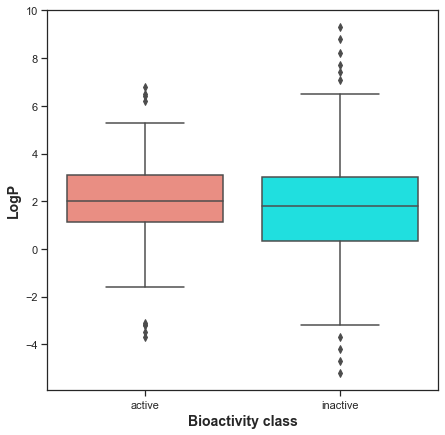

In [128]:
plt.figure(figsize=(7, 7))

sns.boxplot(x = 'class', y = 'xlogp', data = df_2class,palette=['salmon','cyan'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.png')

In [129]:
mannwhitney('xlogp')

,Descriptor,Statistics,p,alpha,Interpretation
0,xlogp,8217.5,0.10134,0.05,Same distribution (fail to reject H0)


In [130]:
df_2class.head()

,chembl_id,molecule_pref_name,target_chembl_id,target_pref_name,target_organism,class,pIC50,pubchem_id,molecular_weight,hbd_count,hba_count,xlogp,natural
0,CHEMBL165,RESVERATROL,CHEMBL399,HeLa,Homo sapiens,active,10.647817,445154,228.247,3,3,3.1,1
1,CHEMBL19224,PAPAVERINE,CHEMBL613633,Ileum,Rattus norvegicus,active,10.229148,4680,339.391,0,5,3.9,1
2,CHEMBL50,QUERCETIN,CHEMBL2362975,No relevant target,NaN,active,9.958607,5280343,302.238,5,7,1.5,1
3,CHEMBL107,COLCHICINE,CHEMBL3879801,NON-PROTEIN TARGET,NaN,active,9.443697,6167,399.443,1,6,1.0,1
4,CHEMBL441687,GLYCYRRHIZIN,CHEMBL3746,11-beta-hydroxysteroid dehydrogenase 2,Homo sapiens,active,9.397940,14982,822.942,8,16,3.7,1


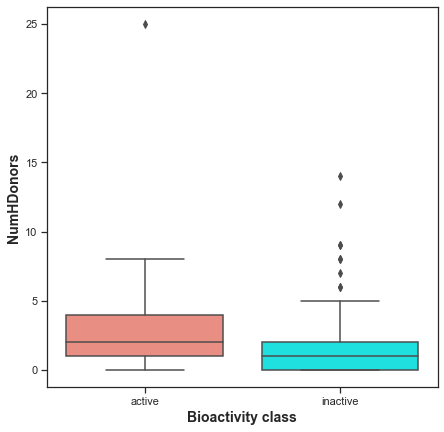

In [131]:
plt.figure(figsize=(7,7))

sns.boxplot(x = 'class', y = 'hbd_count', data = df_2class,palette=['salmon','cyan'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.png')

In [132]:
mannwhitney('hbd_count')

,Descriptor,Statistics,p,alpha,Interpretation
0,hbd_count,5945.5,6.722676e-07,0.05,Different distribution (reject H0)


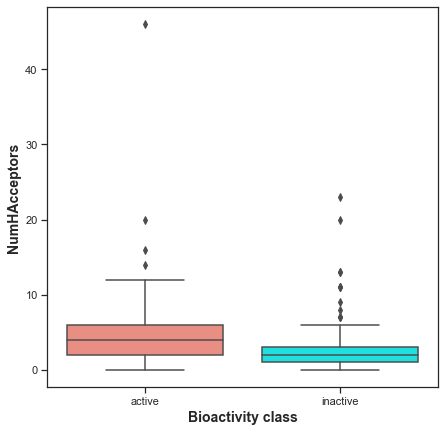

In [133]:
plt.figure(figsize=(7,7))

sns.boxplot(x = 'class', y = 'hba_count', data = df_2class,palette=['salmon','cyan'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHAcceptors.png')

In [134]:
mannwhitney('hba_count')

,Descriptor,Statistics,p,alpha,Interpretation
0,hba_count,5616.0,7.643777e-08,0.05,Different distribution (reject H0)


In [135]:
df_2class.head()
df3_act=df_2class[df_2class['class']=='active']
df3_inact=df_2class[df_2class['class']=='inactive']

In [97]:
df3_act.head()

,chembl_id,molecule_pref_name,target_chembl_id,target_pref_name,target_organism,class,pIC50,pubchem_id,molecular_weight,hbd_count,hba_count,xlogp,natural
0,CHEMBL165,RESVERATROL,CHEMBL399,HeLa,Homo sapiens,active,10.647817,445154,228.247,3,3,3.1,1
1,CHEMBL19224,PAPAVERINE,CHEMBL613633,Ileum,Rattus norvegicus,active,10.229148,4680,339.391,0,5,3.9,1
2,CHEMBL50,QUERCETIN,CHEMBL2362975,No relevant target,NaN,active,9.958607,5280343,302.238,5,7,1.5,1
3,CHEMBL107,COLCHICINE,CHEMBL3879801,NON-PROTEIN TARGET,NaN,active,9.443697,6167,399.443,1,6,1.0,1
4,CHEMBL441687,GLYCYRRHIZIN,CHEMBL3746,11-beta-hydroxysteroid dehydrogenase 2,Homo sapiens,active,9.397940,14982,822.942,8,16,3.7,1


<b> <font size=4> Density Plots </font> <b>

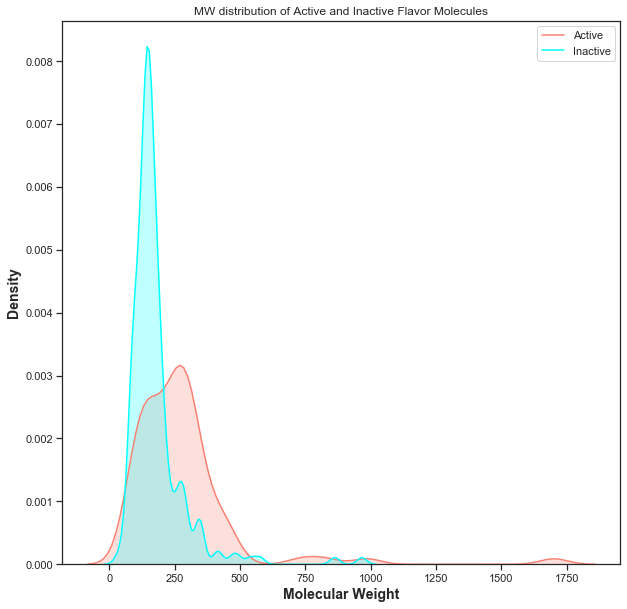

In [136]:
fig = plt.figure(figsize =(10,10)) 
plt.rcParams.update({'font.size': 14})
act=sns.kdeplot(df3_act['molecular_weight'], color='salmon', shade=True,Label='Active')
inact=sns.kdeplot(df3_inact['molecular_weight'], color='cyan', shade=True,Label='Inactive')


# plt.vlines(x_median2, 0, y_median2,label='median_hum', color='r')
# plt.vlines(x_median, 0, y_median,label='median_ind')
plt.title("MW distribution of Active and Inactive Flavor Molecules")
plt.xlabel("Molecular Weight",fontsize=14, fontweight='bold')
plt.ylabel("Density",fontsize=14, fontweight='bold')
#plt.gca().legend(('IndiGen nsSNPs(22 residues)','HUMSAVAR nsSNPs(76 residues)'),loc="upper right")
plt.legend(loc="upper right")
plt.savefig('plot_density_mw.png')

In [99]:
df3_act.head()

,chembl_id,molecule_pref_name,target_chembl_id,target_pref_name,target_organism,class,pIC50,pubchem_id,molecular_weight,hbd_count,hba_count,xlogp,natural
0,CHEMBL165,RESVERATROL,CHEMBL399,HeLa,Homo sapiens,active,10.647817,445154,228.247,3,3,3.1,1
1,CHEMBL19224,PAPAVERINE,CHEMBL613633,Ileum,Rattus norvegicus,active,10.229148,4680,339.391,0,5,3.9,1
2,CHEMBL50,QUERCETIN,CHEMBL2362975,No relevant target,NaN,active,9.958607,5280343,302.238,5,7,1.5,1
3,CHEMBL107,COLCHICINE,CHEMBL3879801,NON-PROTEIN TARGET,NaN,active,9.443697,6167,399.443,1,6,1.0,1
4,CHEMBL441687,GLYCYRRHIZIN,CHEMBL3746,11-beta-hydroxysteroid dehydrogenase 2,Homo sapiens,active,9.397940,14982,822.942,8,16,3.7,1


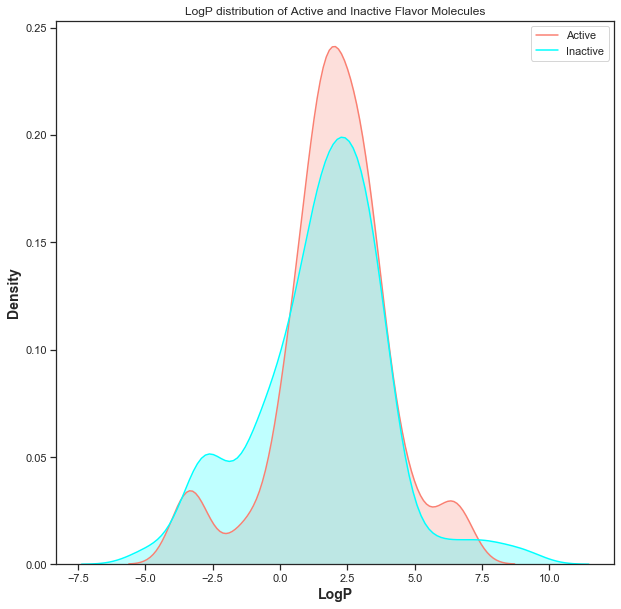

In [137]:
fig = plt.figure(figsize =(10,10)) 
plt.rcParams.update({'font.size': 14})
act=sns.kdeplot(df3_act['xlogp'], color='salmon', shade=True,Label='Active')
inact=sns.kdeplot(df3_inact['xlogp'], color='cyan', shade=True,Label='Inactive')


# plt.vlines(x_median2, 0, y_median2,label='median_hum', color='r')
# plt.vlines(x_median, 0, y_median,label='median_ind')
plt.title("LogP distribution of Active and Inactive Flavor Molecules")
plt.xlabel("LogP",fontsize=14, fontweight='bold')
plt.ylabel("Density",fontsize=14, fontweight='bold')
#plt.gca().legend(('IndiGen nsSNPs(22 residues)','HUMSAVAR nsSNPs(76 residues)'),loc="upper right")
plt.legend(loc="upper right")
plt.savefig('plot_density_logp.png')

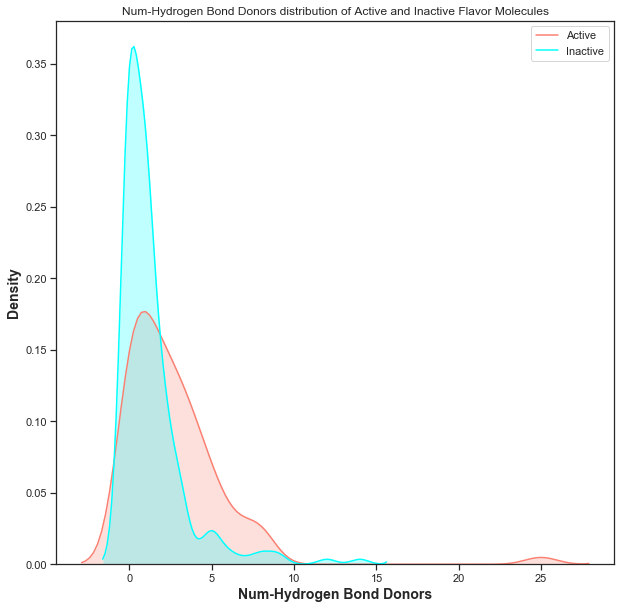

In [138]:
fig = plt.figure(figsize =(10,10)) 
plt.rcParams.update({'font.size': 14})
act=sns.kdeplot(df3_act['hbd_count'], color='salmon', shade=True,Label='Active')
inact=sns.kdeplot(df3_inact['hbd_count'], color='cyan', shade=True,Label='Inactive')


# plt.vlines(x_median2, 0, y_median2,label='median_hum', color='r')
# plt.vlines(x_median, 0, y_median,label='median_ind')
plt.title("Num-Hydrogen Bond Donors distribution of Active and Inactive Flavor Molecules")
plt.xlabel("Num-Hydrogen Bond Donors",fontsize=14, fontweight='bold')
plt.ylabel("Density",fontsize=14, fontweight='bold')
#plt.gca().legend(('IndiGen nsSNPs(22 residues)','HUMSAVAR nsSNPs(76 residues)'),loc="upper right")
plt.legend(loc="upper right")
plt.savefig('plot_density_hbd.png')

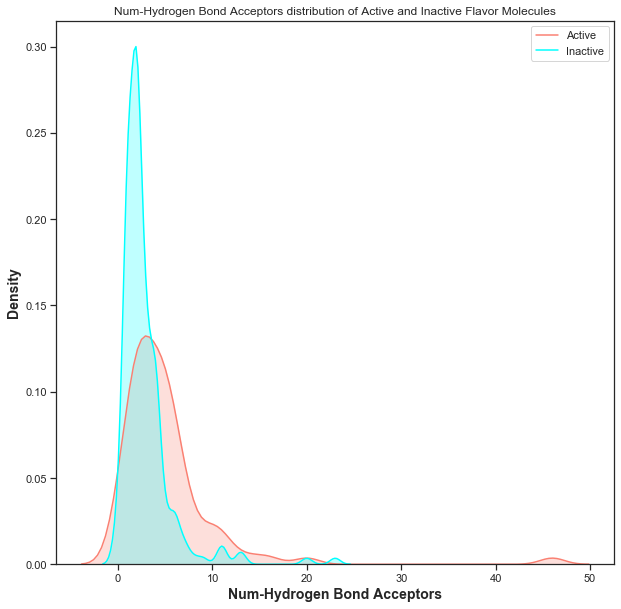

In [139]:
fig = plt.figure(figsize =(10,10)) 
plt.rcParams.update({'font.size': 14})
act=sns.kdeplot(df3_act['hba_count'], color='salmon', shade=True,Label='Active')
inact=sns.kdeplot(df3_inact['hba_count'], color='cyan', shade=True,Label='Inactive')


# plt.vlines(x_median2, 0, y_median2,label='median_hum', color='r')
# plt.vlines(x_median, 0, y_median,label='median_ind')
plt.title("Num-Hydrogen Bond Acceptors distribution of Active and Inactive Flavor Molecules")
plt.xlabel("Num-Hydrogen Bond Acceptors",fontsize=14, fontweight='bold')
plt.ylabel("Density",fontsize=14, fontweight='bold')
#plt.gca().legend(('IndiGen nsSNPs(22 residues)','HUMSAVAR nsSNPs(76 residues)'),loc="upper right")
plt.legend(loc="upper right")
plt.savefig('plot_density_hba.png')

#### **Interpretation of Statistical Results**
##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the Lipinski's descriptors except LogP exhibited ***statistically significant difference*** between the **actives** and **inactives**.

In [136]:
! zip -r results.zip . -i *.csv *.png

  adding: bioactivity_data_flavormolecules_actual_datapreprocessed_output2.csv (164 bytes security) (deflated 74%)
  adding: bioactivity_data_flavormolecules_actual_ouput1.csv (164 bytes security) (deflated 85%)
  adding: bioactivity_data_flavormolecules_scraped_datapreprocessed_output2.csv (164 bytes security) (deflated 70%)
  adding: df2.csv (164 bytes security) (deflated 69%)
  adding: fdb scraped data/bioactivity_data_flavormolecules_scraped.csv (164 bytes security) (deflated 84%)
  adding: fdb scraped data/bioactivity_data_flavormolecules_scraped_ouput1.csv (164 bytes security) (deflated 84%)
  adding: fdb scraped data/flavordb_molecules_scraped.csv (164 bytes security) (deflated 72%)
  adding: fdb scraped data/oubch_to_chemblid.csv (164 bytes security) (deflated 62%)
  adding: fdb scraped data/try.csv (164 bytes security) (deflated 64%)
  adding: fdb_classification_bioactivity_pIC50.csv (164 bytes security) (deflated 69%)
  adding: fdb_molecules_22Nov.csv (164 bytes security) (de